<a href="https://colab.research.google.com/github/Gursewak-S/Project_App_Reviews_Sentiment_Analysis/blob/main/App_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/linkedin-reviews.csv")

In [ ]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info

<bound method DataFrame.info of                                                 Review  Rating
0    Does absolutely nothing for a LinkedIn beginne...       1
1                              Force close(galaxy tab)       1
2    Slow and it tries to upload your contacts with...       1
3    Add ability to customize the profile and move ...       4
4    Good app, but it's a pain that it's not possib...       4
..                                                 ...     ...
697  Can't trust, Going to uninstall just for that ...       1
698  It really gets me linked in with my friends. H...       5
699  It lacks most of what makes the other social n...       4
700  Really disappointed in the new version. Seems ...       2
701  One of the best looking and well designed apps...       5

[702 rows x 2 columns]>

# Exploratory Data Analysis
We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews. Then we
can explore further, such as analyzing the length of reviews, and possibly derive insights from the text of the reviews

# Plotting the Distribution of Rating

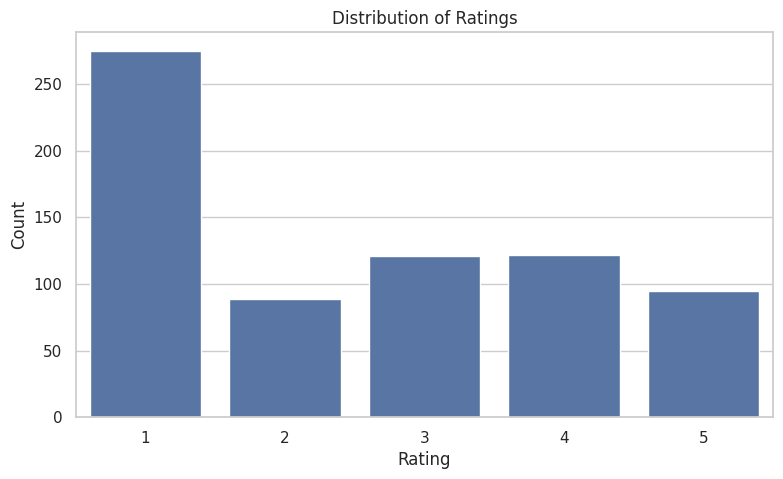

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df, x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Adding Sentiment Labels in the Data
Ve will use Textblob library. Textblob provides a polarity scores raning from -1 (very negative) to 1(very positive) for a given text.
We can use this score to classify each review's sentiment as positive, negative or neutra

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def textblob_sentiment_analysis(review):
  sentiment = TextBlob(review).sentiment
  if sentiment.polarity > 0.1:
    return 'positive'
  elif sentiment.polarity < -0.1:
    return 'Negative'
  else:
    return 'Neutral'

In [ ]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [ ]:
df.sample(5)

,Review,Rating,Sentiment
310,Hangs everytime after update....please fix imm...,3,Neutral
587,Pls add some more features to this. A sent opt...,3,positive
21,Great!,5,positive
197,No job search,2,Neutral
169,Cannot even sign in- Galaxy ace,1,Neutral


**Analyzing App Review Sentiments**

In [ ]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
positive,298
Neutral,297
Negative,107


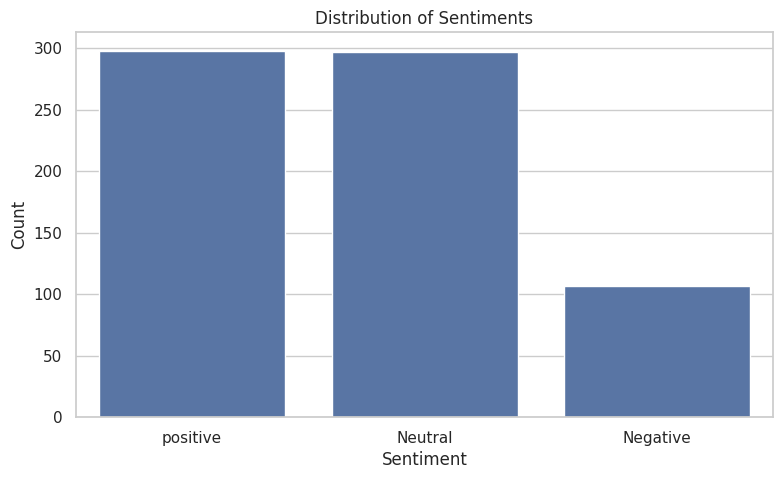

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
            y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

So, we can see althrough the app has low ratings , still the reviewers don't use many negative words in the reviews for the app.

Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical ratings.

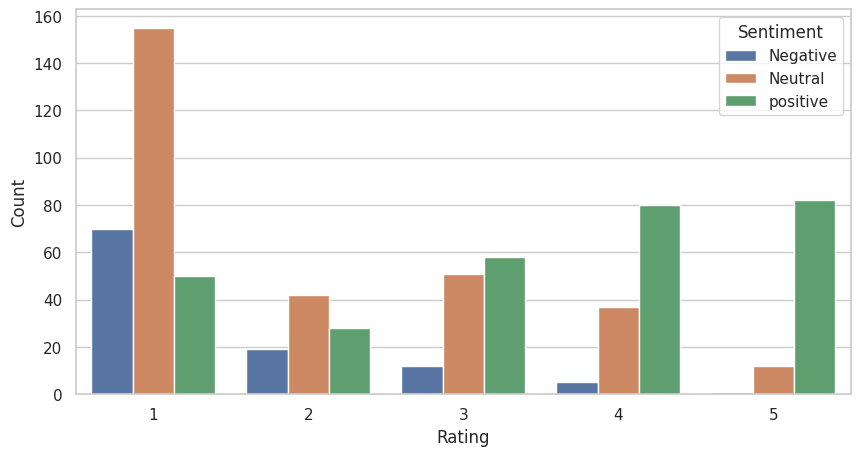

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
              x = 'Rating',
              hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()

# Summary
App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize
feature updates and maintain a positive user community. It involves using data analysis techniques to determine whether the
sentiments in these reviews are positive, negative or neutral.